Importing the Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
import os

A quick overview of the data

In [3]:
# load the training data
parent_dir = os.path.pardir
train_df = pd.read_csv(os.path.join(parent_dir, 'csv_files', 'train.csv'))
train_df.head()

,Feat-1,Feat-2,Feat-3,Feat-4,Feat-5,Feat-6,Feat-7,Feat-8,Feat-9,Feat-10,...,Feat-22,Feat-23,Feat-24,Feat-25,Feat-26,Feat-27,Feat-28,Feat-29,Feat-30,Target
0,0.412963,0.577200,-0.953418,0.798840,0.658006,0.768405,-0.405588,-0.442541,-0.001558,1.049287,...,0.009059,0.646514,0.860895,-2.411875,0.994851,1.025006,0.579802,0.803897,0.904436,0.0
1,0.591946,1.210280,1.718345,3.053790,-1.179496,1.109550,0.775757,0.153515,-0.001558,0.555115,...,0.009059,1.478546,1.046527,0.503741,1.002365,0.842098,0.713030,0.777919,1.009964,0.0
2,1.907598,0.455454,-1.252488,0.215091,0.001179,0.489095,2.519551,0.292663,-0.001558,0.460814,...,3.111020,0.886526,0.740503,1.110159,0.998776,0.704871,0.493281,0.594564,0.580279,0.0
3,1.891311,-1.178866,1.035310,1.221389,1.481984,0.804590,1.561999,-0.699774,-0.001558,0.649795,...,3.111020,1.082386,0.928540,-0.060958,0.988557,0.699047,0.974086,1.213914,1.480364,0.0
4,1.550914,-0.886675,1.014226,0.666486,-0.244051,0.763458,-0.730383,-1.467584,2.171518,0.957251,...,0.009059,0.915975,0.941412,0.527787,1.308168,1.022230,0.592647,0.897614,0.927630,0.0


Removing "Target" Variable

In [4]:
train_df = train_df.drop('Target', axis=1)

Checking for Null Values

In [5]:
train_df.isnull().any().sum()

0

Plotting the histograms of each feature

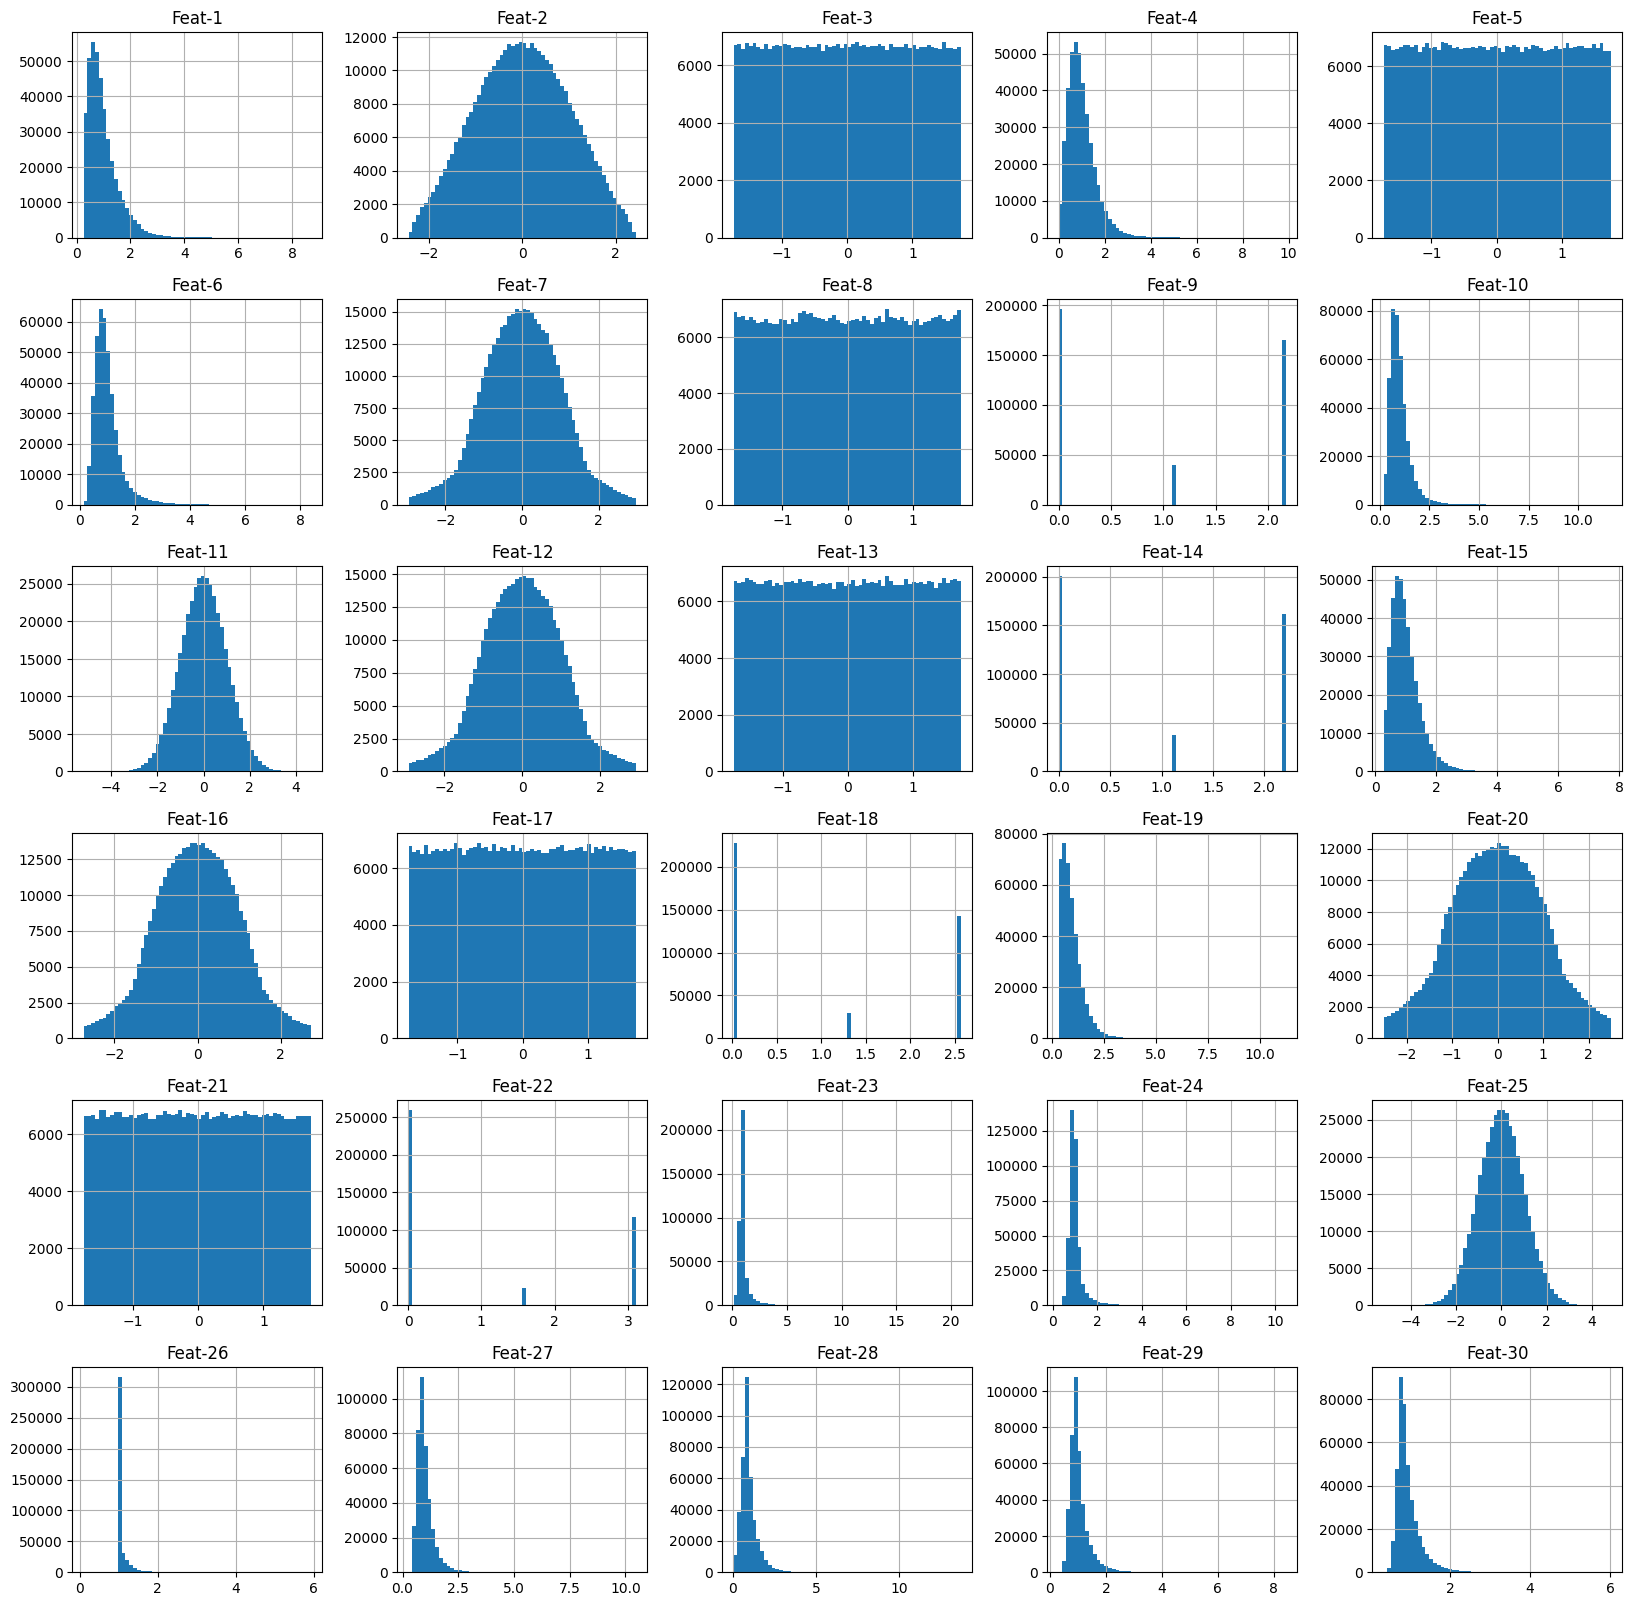

In [6]:
train_df.hist(figsize=(20,20), bins=60)
plt.show()

### Observations -
1. A lot of the features follow Gaussian distribution (Examples: 2, 13, 17). All of these are centered around 0
2. Some of the features follow the F-distribution (Examples: 1, 4, 10). All of them are skewed away from 0
3. A few categorical features can also be found (Examples: 9, 14, 22). All of them happen to be tri-modal
4. A few features follow uniform distribution (Examples: 3, 5, 8)
5. Two classes for the target variable

Plotting the box plots of each feature

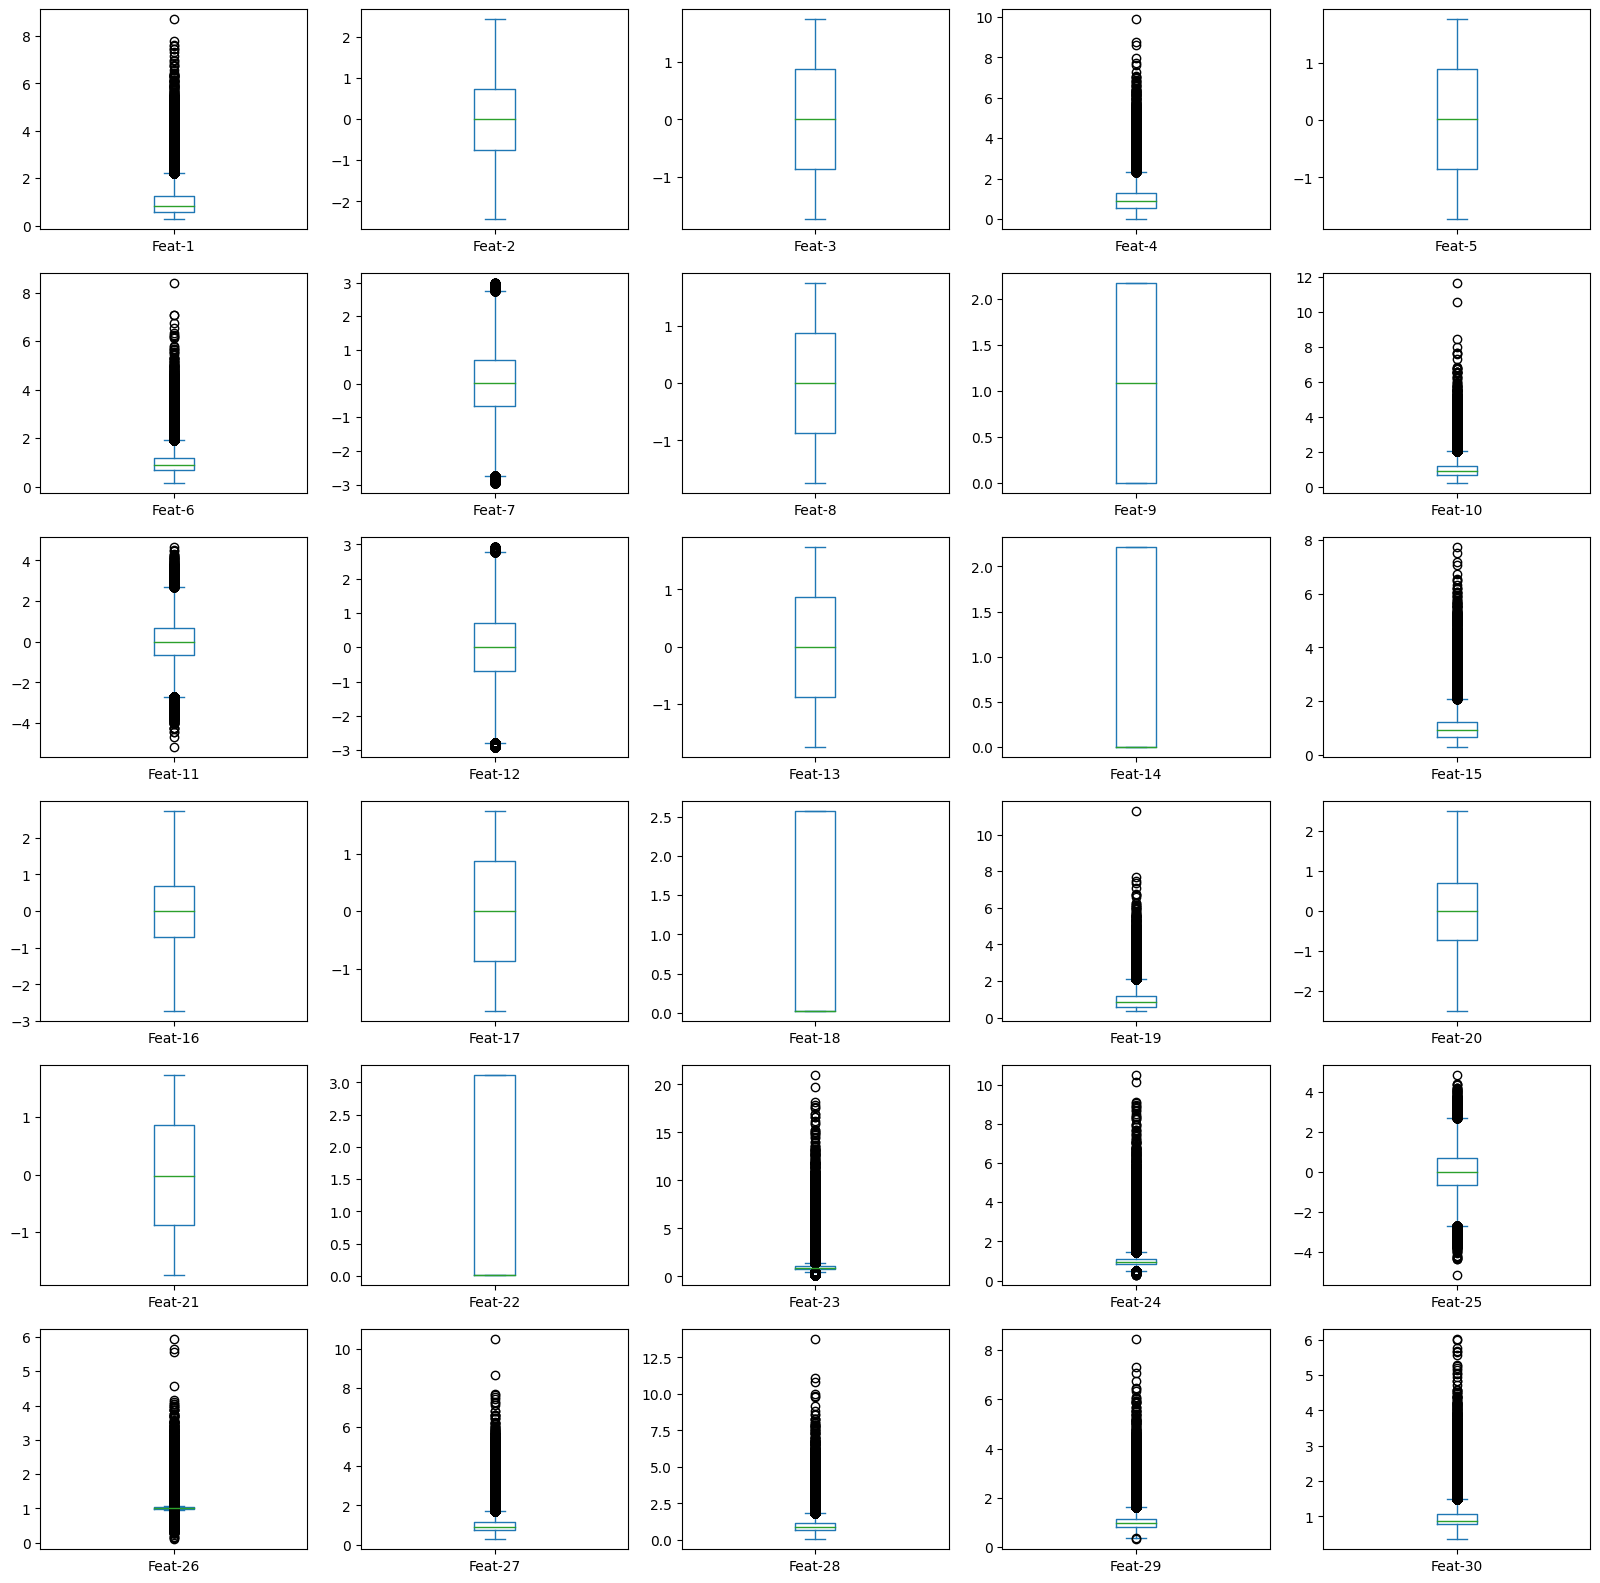

In [7]:
train_df.plot(kind='box', subplots=True, layout=(6, 5), figsize=(20,20))
plt.show()

## Observation

A lot of these features have outliers. Thus the normalization/scaling technique must be chosen such that it is robust to them. 

Correlation between the features

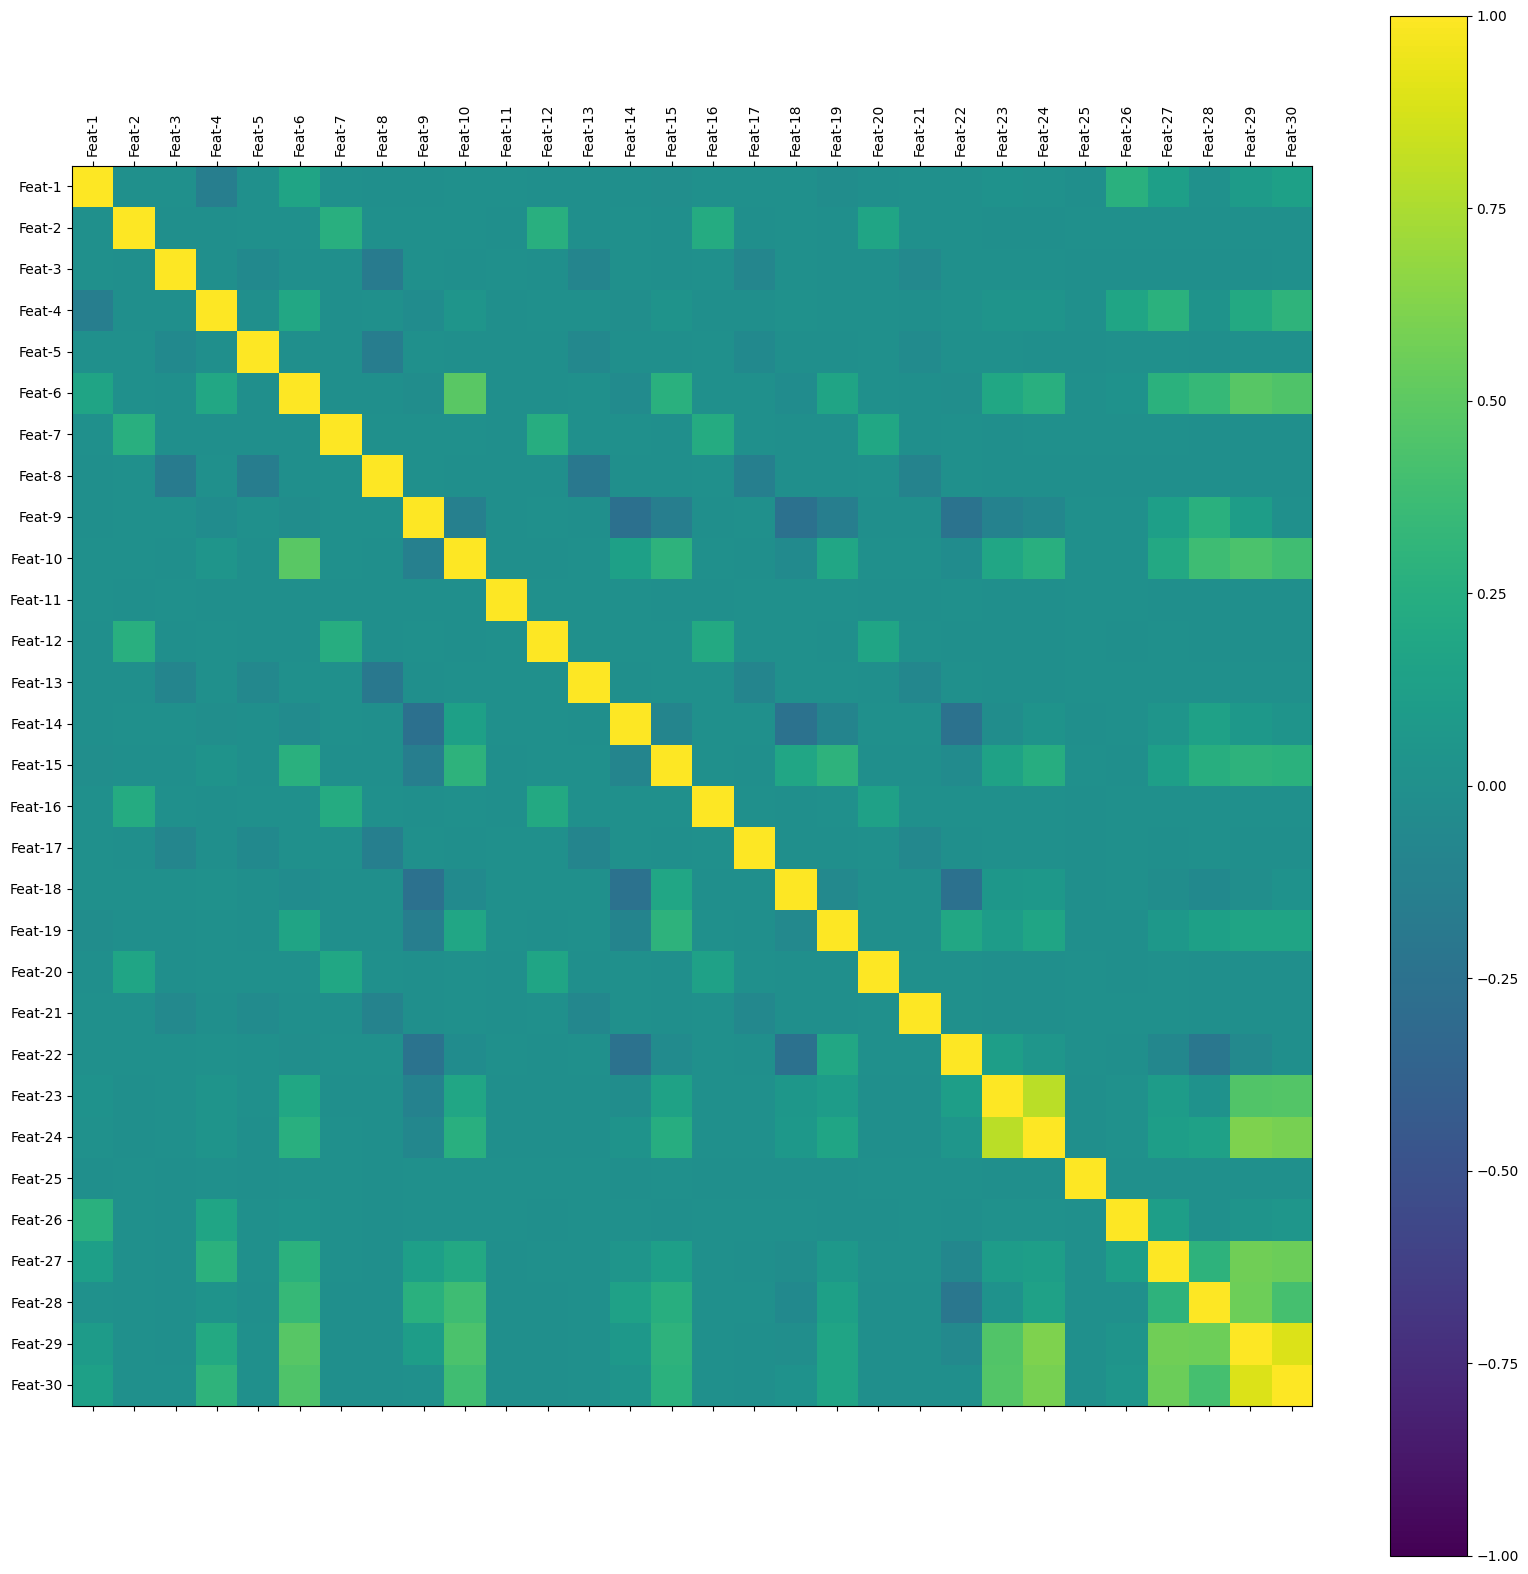

In [8]:
correlations = train_df.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,30,1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_df.columns, rotation=90)
ax.set_yticklabels(train_df.columns)
plt.show()


In [10]:
corr_features = set()

for i in range(0,30):
    for j in range(0,30):
        if i == j or (i+1,j+1) in corr_features or (j+1,i+1) in corr_features:
            continue
        if abs(correlations.iloc[i,j]) > 0.5:
            corr_features.add((i+1,j+1))
            print(train_df.columns[i], train_df.columns[j], correlations.iloc[i,j])

Feat-23 Feat-24 0.7953563120204956
Feat-24 Feat-29 0.611498159974583
Feat-24 Feat-30 0.588871999811396
Feat-27 Feat-29 0.5691329190140545
Feat-27 Feat-30 0.5492615090028847
Feat-28 Feat-29 0.557761271600212
Feat-29 Feat-30 0.8946638804393859


## Observations

Some of the above features are highly correlated. The list and their correlation co-efficients are listed above

### Mutual Information Scores

<Axes: >

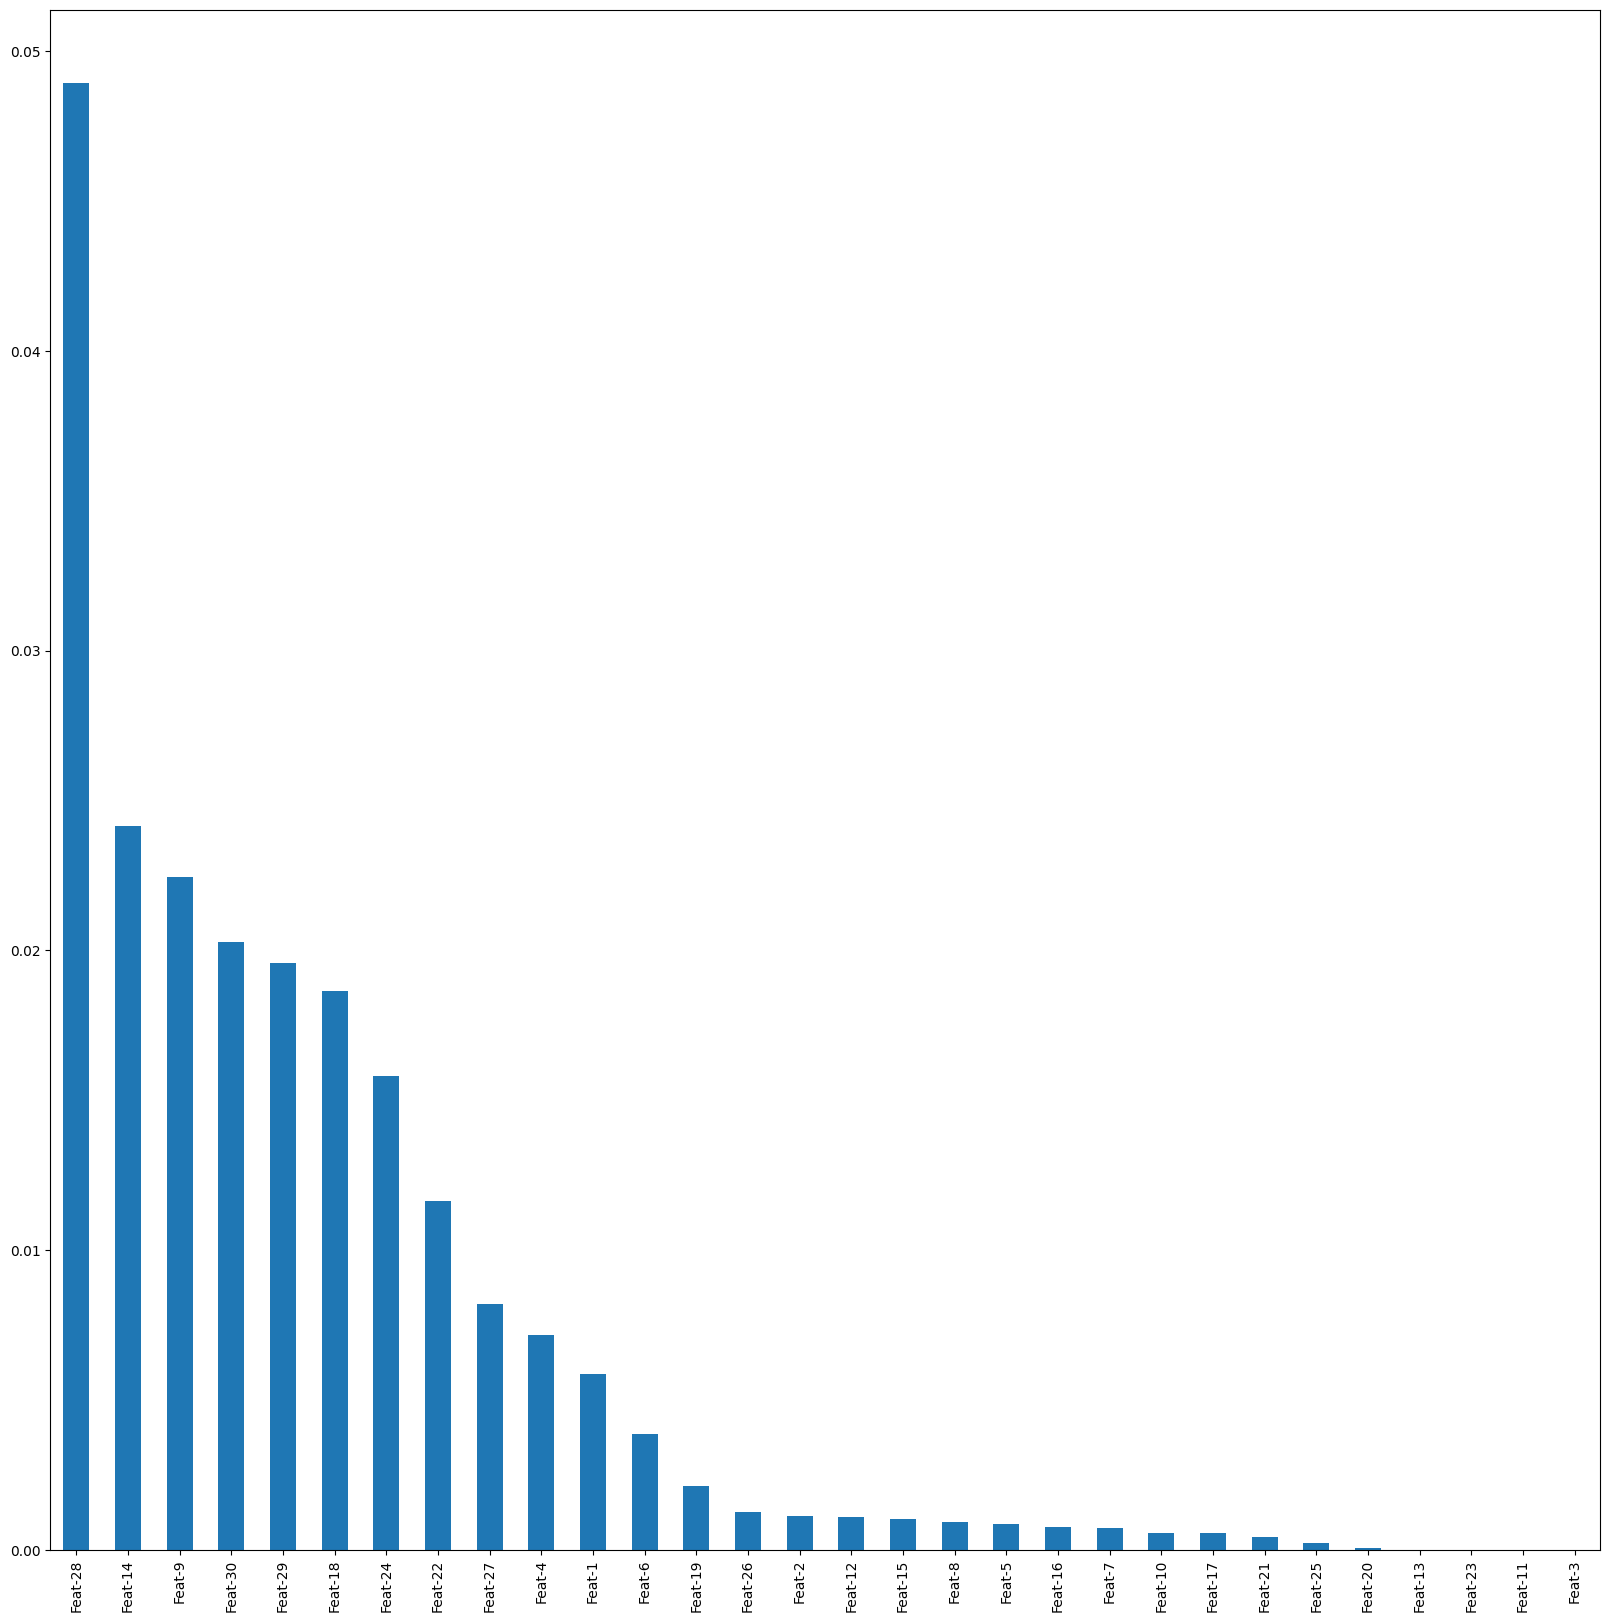

In [10]:
# plot mutual information
train_df = pd.read_csv(os.path.join(parent_dir, 'csv_files', 'train.csv'))
train_target = train_df['Target']
train_data = train_df.drop('Target', axis=1)

mutual_info = mutual_info_classif(train_data, train_target)
mutual_info = pd.Series(mutual_info)

mutual_info.index = train_data.columns
mutual_info.sort_values(ascending=False)

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,20))

## Observations
1. The highest score is of Feat-28. But that too is around 0.05
2. This means, these variables alone are not conclusive enough to make predictions on the target
3. Each one of them is almost independent of the target variable.